<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M1/Notebooks/workshops/workshop_2_nomad_city_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})


In [ ]:
data = pd.read_csv('https://sds-aau.github.io/SDS-master/M1/data/cities.csv')

In [ ]:
data.head()

,place,alpha-2,region,sub-region,cost_nomad,cost_coworking,cost_expat,coffee_in_cafe,cost_beer,places_to_work,free_wifi_available,internet_speed,freedom_score,peace_score,safety,fragile_states_index,press_freedom_index,female_friendly,lgbt_friendly,friendly_to_foreigners,racism,leisure,life_score,nightlife,weed
0,Budapest,HU,Europe,Eastern Europe,1364.0,152.41,1273.0,1.73,1.73,1.0,0.4,31.0,0.6,0.8,0.60,52.7,28.17,1.0,0.27,0.6,0.40,0.80,0.86,1.00,0.0
1,Chiang Mai,TH,Asia,South-eastern Asia,777.0,98.88,780.0,0.85,0.85,0.8,0.6,14.0,0.2,0.4,0.80,78.8,44.53,0.8,0.60,0.6,0.40,0.62,0.75,0.40,0.0
2,Phuket,TH,Asia,South-eastern Asia,1012.0,155.43,1714.0,1.41,1.41,0.8,0.4,14.0,0.2,0.4,0.80,78.8,44.53,0.6,0.80,0.6,0.42,0.60,0.75,0.82,0.0
3,Bangkok,TH,Asia,South-eastern Asia,1197.0,131.41,1158.0,2.12,2.12,1.0,1.0,24.0,0.2,0.4,0.77,78.8,44.53,0.8,0.80,1.0,0.42,0.82,0.72,1.00,0.0
4,Ko Samui,TH,Asia,South-eastern Asia,1352.0,169.56,1347.0,1.41,1.41,0.8,0.4,15.0,0.2,0.4,0.80,78.8,44.53,0.8,0.80,1.0,0.40,0.80,0.80,0.80,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   place                   780 non-null    object 
 1   alpha-2                 780 non-null    object 
 2   region                  780 non-null    object 
 3   sub-region              780 non-null    object 
 4   cost_nomad              780 non-null    float64
 5   cost_coworking          780 non-null    float64
 6   cost_expat              780 non-null    float64
 7   coffee_in_cafe          780 non-null    float64
 8   cost_beer               780 non-null    float64
 9   places_to_work          780 non-null    float64
 10  free_wifi_available     780 non-null    float64
 11  internet_speed          780 non-null    float64
 12  freedom_score           780 non-null    float64
 13  peace_score             780 non-null    float64
 14  safety                  780 non-null    fl

In [ ]:
data.loc[:,'cost_nomad':'weed']

,cost_nomad,cost_coworking,cost_expat,coffee_in_cafe,cost_beer,places_to_work,free_wifi_available,internet_speed,freedom_score,peace_score,safety,fragile_states_index,press_freedom_index,female_friendly,lgbt_friendly,friendly_to_foreigners,racism,leisure,life_score,nightlife,weed
0,1364.0,152.41,1273.0,1.73,1.73,1.0,0.4,31.0,0.6,0.8,0.60,52.7,28.17,1.0,0.27,0.6,0.40,0.80,0.86,1.00,0.0
1,777.0,98.88,780.0,0.85,0.85,0.8,0.6,14.0,0.2,0.4,0.80,78.8,44.53,0.8,0.60,0.6,0.40,0.62,0.75,0.40,0.0
2,1012.0,155.43,1714.0,1.41,1.41,0.8,0.4,14.0,0.2,0.4,0.80,78.8,44.53,0.6,0.80,0.6,0.42,0.60,0.75,0.82,0.0
3,1197.0,131.41,1158.0,2.12,2.12,1.0,1.0,24.0,0.2,0.4,0.77,78.8,44.53,0.8,0.80,1.0,0.42,0.82,0.72,1.00,0.0
4,1352.0,169.56,1347.0,1.41,1.41,0.8,0.4,15.0,0.2,0.4,0.80,78.8,44.53,0.8,0.80,1.0,0.40,0.80,0.80,0.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,3461.0,243.51,2463.0,3.00,3.00,0.2,0.2,2.0,0.6,0.4,0.20,86.2,25.81,0.2,0.20,0.4,0.00,0.40,0.31,0.20,0.0
776,2833.0,288.58,2013.0,2.04,2.04,0.4,0.2,0.0,0.6,0.2,0.20,91.0,29.94,0.2,0.20,0.4,0.40,0.20,0.22,0.20,0.0
777,2525.0,201.55,1148.0,2.48,2.48,0.4,0.4,3.0,0.2,0.2,0.20,96.4,57.89,0.2,0.20,0.8,0.00,0.40,0.22,0.20,0.0
778,1162.0,215.73,1079.0,2.65,2.65,0.4,0.2,2.0,0.2,0.2,0.20,110.8,81.35,0.2,0.20,0.2,0.00,0.20,0.01,0.20,0.0


In [ ]:
my_selector_list = [5,7,8]
data.iloc[:,my_selector_list]

,cost_coworking,coffee_in_cafe,cost_beer
0,152.41,1.73,1.73
1,98.88,0.85,0.85
2,155.43,1.41,1.41
3,131.41,2.12,2.12
4,169.56,1.41,1.41
...,...,...,...
775,243.51,3.00,3.00
776,288.58,2.04,2.04
777,201.55,2.48,2.48
778,215.73,2.65,2.65


In [ ]:
data_num = data.iloc[:,4:]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
data_scaled = scaler.fit_transform(data_num)

In [ ]:
pd.DataFrame(data_scaled).describe()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
pca_data = pca.fit_transform(data_scaled)

In [ ]:
pca_data.shape

(780, 2)

In [ ]:
pca.components_.shape

(2, 21)

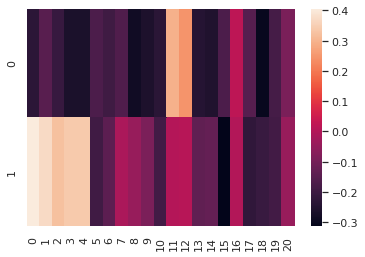

In [ ]:
sns.heatmap(pca.components_)

In [ ]:
data.columns[4:][[16]]

Index(['racism'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


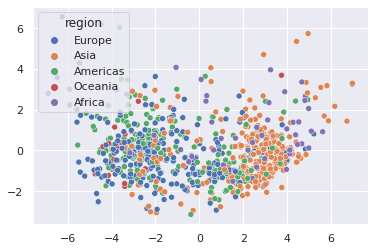

In [ ]:
sns.scatterplot(pca_data[:,0], pca_data[:,1], hue=data.region)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler() 

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=5)

In [ ]:
minmax_data = minmax.fit_transform(data_num)

In [ ]:
nmf_data = nmf.fit_transform(minmax_data)

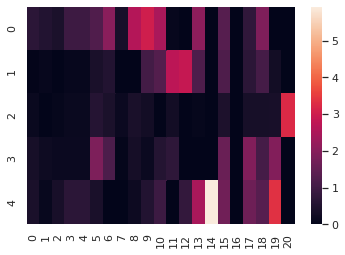

In [ ]:
sns.heatmap(nmf.components_)

In [ ]:
!pip install -q umap-learn

     |████████████████████████████████| 80 kB 5.3 MB/s 
     |████████████████████████████████| 1.1 MB 18.7 MB/s 


In [ ]:
import umap
reducer = umap.UMAP()

In [ ]:
umap_data = reducer.fit_transform(data_scaled)
umap_data.shape

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(780, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


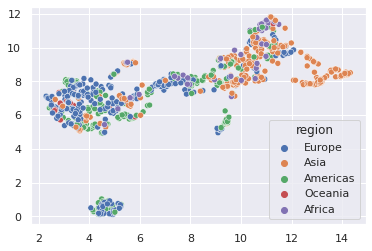

In [ ]:
# Let's plot the matrix

sns.scatterplot(umap_data[:,0], umap_data[:,1], hue = data.region )

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
clusterer = KMeans(n_clusters=3)
clusterer.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


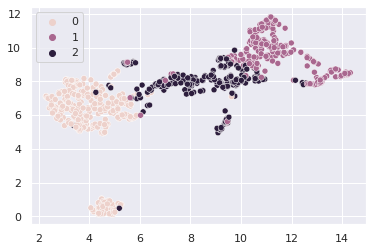

In [ ]:
sns.scatterplot(umap_data[:,0], umap_data[:,1], hue = clusterer.labels_)